<a href="https://colab.research.google.com/github/chihchao/application-of-programming/blob/main/machine_learning_SGDRegressor_california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



| 特徵        | 中文         | 說明 |
|----------------|------------------|-----------|
| MedInc         | 中位數收入       | 每年收入的千美元，反映經濟水平，與房價高度相關。 |
| HouseAge       | 房屋年齡         | 該區域房屋年齡的中位數，舊屋可能需維護影響房價。 |
| AveRooms       | 平均房間數       | 每個住宅的平均房間數，房間數多通常表示房屋較大。 |
| Population     | 人口數           | 區域總人口，影響社會與經濟活動及房價需求。 |
| AveOccup       | 平均住戶數       | 每個住宅的平均住戶人數，住戶多可能需更大空間。 |
| Latitude       | 緯度           | 區域的緯度位置，影響氣候與經濟特徵，進而影響房價。 |
| Longitude      | 經度           | 區域的經度位置，影響與城市距離等地理特徵。 |
| MedHouseVal    | 中位數房價      | 每個區域的中位數房價（千美元），為預測目標變數。 |


In [9]:
from sklearn.datasets import fetch_california_housing

# 載入資料集
california_housing = fetch_california_housing(as_frame=True)
X, y = california_housing.data, california_housing.target
df = california_housing.frame

<Axes: >

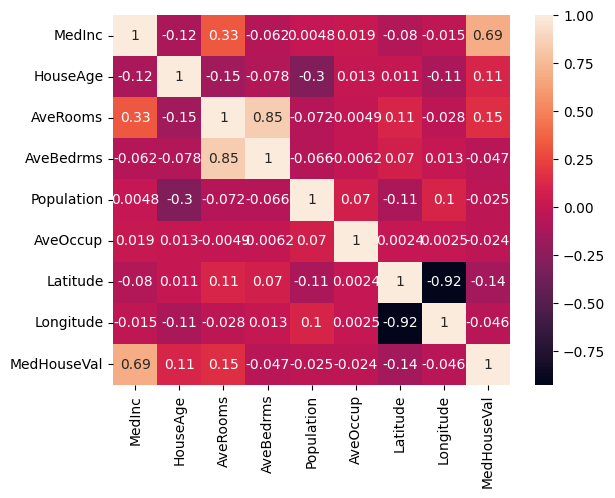

In [3]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='Latitude', ylabel='Longitude'>

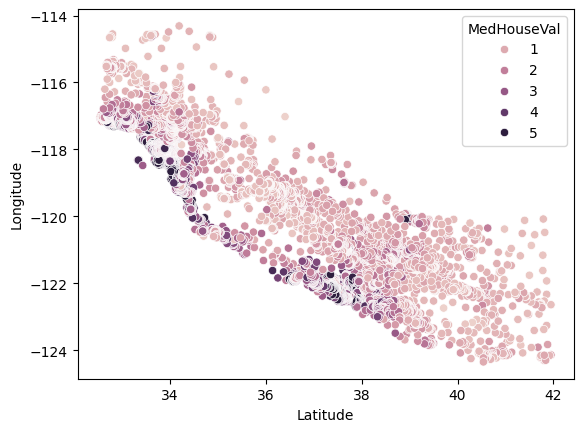

In [7]:
sns.scatterplot(x='Latitude', y='Longitude', hue='MedHouseVal', data=df)

<Axes: xlabel='MedInc', ylabel='Count'>

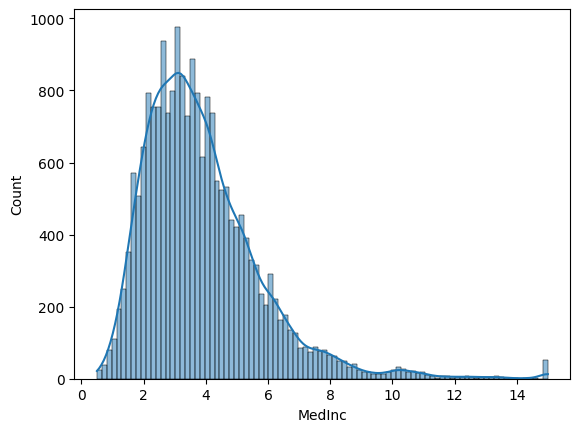

In [5]:
# 查看收入的分佈
sns.histplot(df['MedInc'], kde=True)

<Axes: xlabel='AveOccup'>

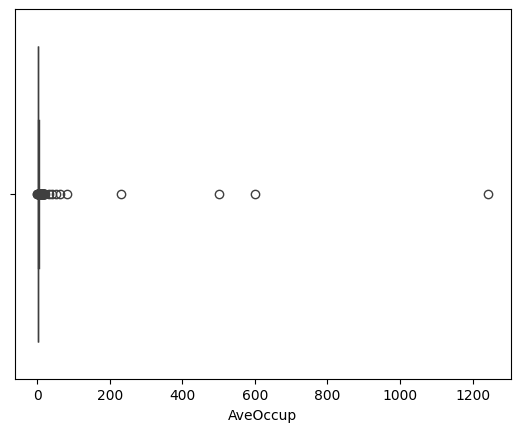

In [11]:
# 檢查 AveOccup 的異常值
sns.boxplot(x=df['AveOccup'])

In [13]:
df.loc[df['AveOccup'].idxmax()]

,19006
MedInc,10.226400
HouseAge,45.000000
AveRooms,3.166667
AveBedrms,0.833333
Population,7460.000000
AveOccup,1243.333333
Latitude,38.320000
Longitude,-121.980000
MedHouseVal,1.375000


<Axes: xlabel='MedHouseVal', ylabel='Count'>

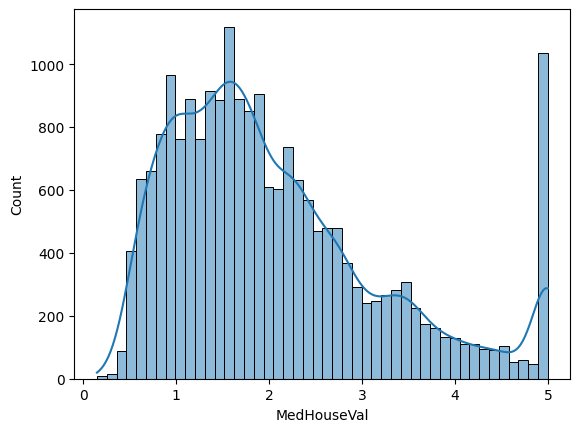

In [6]:
# 查看房價（MedHouseVal）的分佈
sns.histplot(df['MedHouseVal'], kde=True)

In [40]:
# 分割資料夾
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler
# 特徵值標準化
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)
# 目標值標準化
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel() # 將 y_train_scaled 扁平化成一維陣列
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

In [44]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(X_train_scaled, y_train_scaled)

SGDRegressor()

In [48]:
r2 = sgd.score(X_test_scaled, y_test_scaled)
print(f'R2 Score: {r2:.2f}')

R2 Score: 0.58


In [47]:
y_pred_scaled = sgd.predict(X_test_scaled)
# 還原成原始的數據
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
for i in range(10):
    print(f'Predicted: {y_pred[i]:.2f}; Real: {y_test.iloc[i]:.2f}')

Predicted: 0.69; Real: 0.48
Predicted: 1.86; Real: 0.46
Predicted: 2.68; Real: 5.00
Predicted: 2.85; Real: 2.19
Predicted: 2.82; Real: 2.78
Predicted: 1.93; Real: 1.59
Predicted: 2.65; Real: 1.98
Predicted: 2.19; Real: 1.57
Predicted: 2.69; Real: 3.40
Predicted: 3.75; Real: 4.47


In [51]:
from sklearn.metrics import mean_squared_error, r2_score

# 計算 MSE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("均方誤差 (MSE):", mse)
print(f"R²: {r2}")

均方誤差 (MSE): 0.551106792634928
R²: 0.5794390897910843


In [52]:
import pandas as pd
import numpy as np

# 假設我們的虛擬資料（包含所有訓練用的特徵）
data = {
    'MedInc': [8.0],        # 中位數收入
    'HouseAge': [30.0],     # 房屋年齡
    'AveRooms': [6.0],      # 平均房間數
    'AveBedrms': [2.0],     # 平均臥室數
    'Population': [1000],    # 人口數
    'AveOccup': [3.0],      # 平均住戶數
    'Latitude': [37.0],     # 緯度
    'Longitude': [-122.0]  # 經度
}

virtual_df = pd.DataFrame(data)

# 顯示虛擬資料
print(virtual_df)

# 使用訓練好的模型進行預測
X_virtual_scaled = scaler_x.transform(virtual_df)
y_pred_scaled = sgd.predict(X_virtual_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# 顯示預測結果
print(f"預測的中位數房價 (MedHouseVal) 為: ${y_pred[0]*1000:.2f}")


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0     8.0      30.0       6.0        2.0        1000       3.0      37.0   

   Longitude  
0     -122.0  
預測的中位數房價 (MedHouseVal) 為: $4598.41


In [ ]:
import pandas as pd
import joblib

# Save the model, scaler_x, and scaler_y
joblib.dump(sgd, 'sgd_model.pkl')
joblib.dump(scaler_x, 'scaler_x.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')


# Example of loading and using the saved model
# Load the saved model, scaler_x, and scaler_y
loaded_sgd = joblib.load('sgd_model.pkl')
loaded_scaler_x = joblib.load('scaler_x.pkl')
loaded_scaler_y = joblib.load('scaler_y.pkl')

# 假設我們的虛擬資料（包含所有訓練用的特徵）
data = {
    'MedInc': [8.0],        # 中位數收入
    'HouseAge': [30.0],     # 房屋年齡
    'AveRooms': [6.0],      # 平均房間數
    'AveBedrms': [2.0],     # 平均臥室數
    'Population': [1000],    # 人口數
    'AveOccup': [3.0],      # 平均住戶數
    'Latitude': [37.0],     # 緯度
    'Longitude': [-122.0]  # 經度
}

virtual_df = pd.DataFrame(data)

# 使用加載的模型進行預測
X_virtual_scaled = loaded_scaler_x.transform(virtual_df)
y_pred_scaled = loaded_sgd.predict(X_virtual_scaled)
y_pred = loaded_scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# 顯示預測結果
print(f"預測的中位數房價 (MedHouseVal) 為: ${y_pred[0]*1000:.2f}")
